In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import os
import csv
import time

In [3]:

#fle = "/Users/cswitzer/Dropbox/SonicationBehavior/SonBehData/2016_10_19__11_23_51_424_220_450_test.txt"

fle = os.path.join("D:\\Dropbox\\SonicationBehavior\\SonBehData\\2016_10_19__11_23_51_424_220_450_test.txt")

exx = np.transpose(pd.read_csv(fle, sep = " ", header = None))

In [4]:
exx.head()

,0,1
0,0.000000,-0.014654
1,0.000005,-0.015952
2,0.000010,-0.015628
3,0.000015,-0.014654
4,0.000020,-0.015303


In [5]:
len(exx)

20000

In [6]:
# convert data to m/s/s
data = np.array(exx.loc[:,1])*1000 / 10.17
data = data - np.mean(data)

log_rate = 200000.0

n =len(data) # length of the signal
k = np.arange(n, step = 1)
T = n/log_rate
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range

Y = np.fft.fft(data)/n * 2# fft computing and normalization
Y = Y[range(int(n/2))]

# calculate top frequency
ind = np.argpartition(abs(Y), -4)[-4:]
# Find highest point on the spectrum
peakFrq = frq[ind[::-1]]
pwr = (abs(Y)[ind[::-1]])
domPK = [x for (y,x) in sorted(zip(pwr,peakFrq), reverse = True)][0]

beeFrqPwr = pwr[peakFrq == domPK]

In [7]:
# plot envelope
from scipy import signal
xs = np.array(range(len(exx)))/ float(log_rate)
data = data
peakind = signal.find_peaks_cwt(data, widths = [70])
#peakind, xs[peakind], data[peakind]


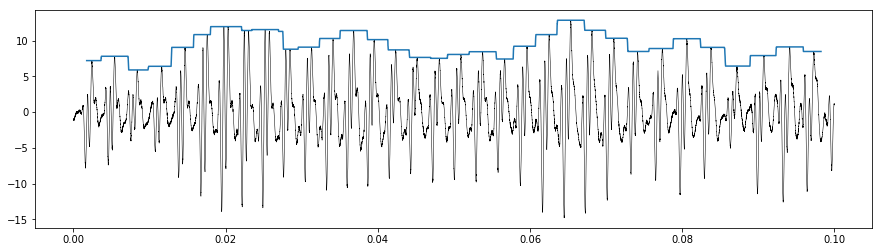

In [8]:

f, ax1 = plt.subplots()
f.set_figwidth(15)
ax1.plot(np.array(range(len(exx)))/ float(log_rate), data,color = 'black', linewidth=0.5 )
#ax1.scatter(xs[peakind], data[peakind])
mxs = pd.Series(data).rolling(700, center = True).max().tolist()
ax1.plot(np.linspace(0, np.max(np.array(range(len(exx)))/ float(log_rate)), num = len(mxs)), mxs)

In [9]:
from statsmodels.nonparametric.smoothers_lowess import lowess

mxs = pd.Series(data).rolling(700, center = True).max().tolist()
xs =  np.linspace(0, np.max(np.array(range(len(exx)))/ float(log_rate)), num = len(mxs))

mms = pd.Series(data).rolling(700, center = True).min().tolist()
xsm =  np.linspace(0, np.max(np.array(range(len(exx)))/ float(log_rate)), num = len(mms))

smth = lowess(endog = mxs, exog = xs, frac = 0.06, )
smth2 = lowess(endog = mms, exog = xsm, frac = 0.06)

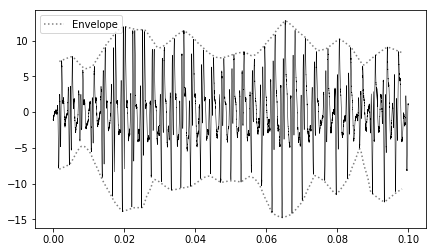

In [10]:
f, ax1 = plt.subplots()
f.set_figwidth(7)
ax1.plot(smth[:,0], smth[:, 1], linestyle= ':', color = 'grey', label = "Envelope")
ax1.plot(smth2[:,0], smth2[:, 1], linestyle= ':', color = 'grey')
ax1.plot(np.array(range(len(exx)))/ float(log_rate), data,color = 'black', linewidth=0.5 )
#ax1.scatter(xs[peakind], data[peakind])
mxs = pd.Series(data).rolling(700, center = True).max().tolist()
#ax1.plot(xs, mxs, linestyle= ':', color = 'grey')
#ax1.plot(xsm, mms, linestyle= ':', color = 'grey')
plt.legend(loc="upper left")


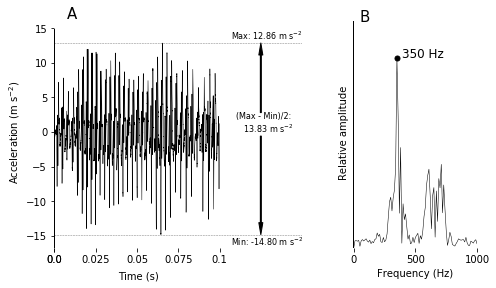

-14.801025771246508 12.862464519884421 13.831745145565463


In [11]:
plt.figure(figsize=(7,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1]) 

# create subplot 1
ax1 = plt.subplot(gs[0])
#ax1.plot(smth[:,0], smth[:, 1], linestyle= ':', color = 'grey', label = "Envelope")
#ax1.plot(smth2[:,0], smth2[:, 1], linestyle= ':', color = 'grey')
#plt.legend(loc="upper center")
ax1.plot(np.array(range(len(exx)))/ float(log_rate), data,color = 'black', linewidth=0.5 )
#ax1.set_ylabel("Acceleration (m s$^{-2})$")
ax1.set_ylabel("Acceleration (m s$^{-2})$")
ax1.set_xlabel("Time (s)")
ax1.set_frame_on(False)
ax1.axhline(y=np.max(data), color='grey', linestyle='--', linewidth = 0.5)
ax1.axhline(y=np.min(data), color='grey', linestyle='--', linewidth = 0.5)
ax1.set_xlim(-0.0002, 0.15)
ax1.set_ylim(-0.17*1000 / 10.19, 0.17*1000 / 10.19)

ax1.annotate(' ', xy=(0.125, np.min(data)), xytext=(0.125, -0.00),
            arrowprops=dict(facecolor='black', width = 1, headwidth = 4)
            )
ax1.annotate(' ', xy=(0.125, np.max(data)), xytext=(0.125, 0.014*1000 / 10.19),
            arrowprops=dict(facecolor='black', width = 1, headwidth = 4)
            )

ax1.annotate('(Max - Min)/2:\n   13.83 m s$^{-2}$', xy=(0.11, np.min(data)), xytext=(0.110, 0), 
             size=8
            )

ax1.annotate('Max: 12.86 m s$^{-2}$', xy=(0.11, np.min(data)), xytext=(0.107, np.max(data) + 0.1*np.std(data)), 
             size=8
            )
""
ax1.annotate('Min: -14.80 m s$^{-2}$', xy=(0.11, np.min(data)), xytext=(0.107, np.min(data) - 0.35*np.std(data)), 
             size=8
            )

ax1.plot([0,0.1], [ax1.get_ylim()[0], ax1.get_ylim()[0]], 'black', linewidth = 1)
ax1.plot([ax1.get_xlim()[0],ax1.get_xlim()[0]], [ax1.get_ylim()[0], 0.152*1000 / 10.19], 'black', linewidth = 1)
# add "L" shaped borders
#ax1.axvline(x = ax1.get_xlim()[0], linewidth = 1, color = 'black')
#ax1.axhline(y = ax1.get_ylim()[0], linewidth = 1, color = 'black')
ax1.axes.xaxis.set_ticklabels([0.000, 0.000,  0.025, 0.05, 0.075, 0.100])
ax1.axes.xaxis.set_ticks([0.000, 0.000,  0.025, 0.05, 0.075, 0.100])
ax1.xaxis.set_label_coords(0.342, -0.1)


def get_axis_limits(ax, scale=.98):
    return ax.get_xlim()[0] + np.diff(ax.get_xlim())*0.05, ax.get_ylim()[1]*scale     

# create subplot 2
ax2 = plt.subplot(gs[1])
ax2.plot(frq,abs(Y), color = "black", linewidth=0.5)
ax2.plot(domPK, beeFrqPwr,'o', color = 'black', markersize = 5)
ax2.annotate('350 Hz', xy=(domPK, beeFrqPwr), xytext=(domPK + 40, beeFrqPwr- 0.0001), size = 12
            )
ax2.set_xlim(-3, 1003)
ax2.set_ylabel('Relative amplitude')
ax2.set_xlabel('Frequency (Hz)')
plt.tight_layout()
ax2.set_frame_on(False)
ax2.axes.yaxis.set_ticklabels([])
ax2.axes.yaxis.set_ticks([])
ax2.set_ylim(0, 0.013*1000 / 10.19*2)

#### add "L" shaped borders
####ax2.axvline(x = ax2.get_xlim()[0], linewidth = 1, color = 'black')
ax2.plot([ax2.get_xlim()[0],ax2.get_xlim()[0]], [ax2.get_ylim()[0], 0.0127*1000 / 10.17*2], 'black', linewidth = 1)
#ax2.axhline(y = ax2.get_ylim()[0], linewidth = 1, color = 'black')
ax2.plot([0,1500], [ax2.get_ylim()[0], ax2.get_ylim()[0]], 'black', linewidth = 1)


####plt.savefig("/Users/cswitzer/Dropbox/SonicationBehavior/SonBehFigs/ExampleSpectrum_noAnnot_amp3.pdf", width = 7, height = 1.5)

# plt.savefig("D:/Dropbox/SonicationBehavior/SonBehFigs/ExampleSpectrum_noAnnot_amp3.pdf", width = 7, height = 1.5)
# plt.savefig("D:/Dropbox/SonicationBehavior/SonBehFigs/ExampleSpectrum_noAnnot_amp3.svg", width = 7, height = 1.5)
ax1.annotate('A', xy=get_axis_limits(ax1), size = 15)
ax2.annotate('B', xy=get_axis_limits(ax2), size = 15)

####plt.savefig("/Users/cswitzer/Dropbox/SonicationBehavior/SonBehFigs/ExampleSpectrum_amp3.pdf", width = 7, height = 1.5)
# plt.savefig("D:/Dropbox/SonicationBehavior/SonBehFigs/ExampleSpectrum_amp3.pdf", width = 7, height = 1.5)
# plt.savefig("D:/Dropbox/SonicationBehavior/SonBehFigs/ExampleSpectrum_amp3.svg", width = 7, height = 1.5)
plt.show()

print(np.min(data), np.max(data), (np.max(data) - np.min(data))/2)


In [12]:
### End of freq spectrum

### Show comparison of acc, vel, displacement

In [18]:
class fft_:
    
    '''
    Does fft spectrum with accelerometer data
    
    '''
    def __init__(self, timesteps, sigl, cutoff = 200):
        self.timesteps = timesteps
        self.sigl = sigl - np.mean(sigl)
        self.log_rate = len(self.timesteps)*(1/(np.round(np.max(self.timesteps), decimals = 1)))
        
    
    def butter_highpass(self, order=5):
        self.order = order
        nyq = 0.5 * self.log_rate
        normal_cutoff = self.cutoff / nyq
        b, a = signal.butter(self.order, normal_cutoff, btype='high', analog=False)
        return b,a

    def butter_highpass_filter(self, sigToFilter, cutoff = 200, order=5):
        self.cutoff = cutoff
        b, a = self.butter_highpass()
        newSig = np.concatenate([np.flip(sigToFilter[0:5000], axis = 0),
                                 sigToFilter, 
                                 np.flip(sigToFilter[15000:len(sigToFilter)], axis = 0) ])
        self.newSig = newSig
        y = signal.filtfilt(b, a, newSig)
        self.filtered_sigl = y[5000:25000]
        
    
    def filterAcc(self):
        self.butter_highpass_filter(sigToFilter= self.sigl, cutoff = 220)
        self.filtered_acc = self.filtered_sigl - np.mean(self.filtered_sigl)
    
    
    def doubleIntegrate(self, sigToIntegrate):
        vel = np.cumsum(sigToIntegrate)/self.log_rate
        pos = np.cumsum(vel - np.mean(vel)) / self.log_rate
        self.pos_unfilt = pos - np.mean(pos)
        
        
        # highpass filter position
        self.butter_highpass_filter(sigToFilter= pos, cutoff = 100)
        self.pos = self.filtered_sigl - np.mean(self.filtered_sigl)
        
        # higpass filter velocity
        self.butter_highpass_filter(sigToFilter= vel, cutoff = 100)
        self.vel = self.filtered_sigl - np.mean(self.filtered_sigl)
         
    
    def fft_fit(self, inputSignal):
        n =len(inputSignal) # length of the sigl
        k = np.arange(n, step = 1)
        T = n/self.log_rate
        frq = k/T # two sides frequency range
        frq = frq[range(int(n/2))] # one side frequency range

        # fft computing and normalization (note that *2 is so that it is scaled properly)
        Y = np.fft.fft(inputSignal)/n *2 
        Y = Y[range(int(n/2))]

        # calculate top frequency
        ind = np.argpartition(abs(Y), -4)[-4:]
        
        # Find highest point on the spectrum
        self.peakFrq = frq[ind[::-1]]
        self.pwr = (abs(Y)[ind[::-1]])
        
        self.dominant_freq = [x for (y,x) in sorted(zip(self.pwr,self.peakFrq), reverse = True)][0]
        self.max_amp = self.pwr[self.peakFrq == self.dominant_freq]
        self.Y = Y
        self.frq = frq
        self.fftSignal = inputSignal
        
        
        
    def plot_fft(self, title = "", xlabel ="", ylabel = ""):    
        plt.figure(figsize=(10,4))
        gs = gridspec.GridSpec(1, 2, width_ratios=[2,2]) 

        # create subplot 1
        ax1 = plt.subplot(gs[0])
        ax1.plot(self.timesteps[0:len(self.fftSignal)],self.fftSignal, color = 'black', linewidth=0.5)
        ax1.set_title(title + " signal")
        ax1.set_xlabel(xlabel)
        ax1.set_ylabel(ylabel)
    
        # subplot 2
        ax2 = plt.subplot(gs[1])
        ax2.plot(self.frq, abs(self.Y), color = "black", linewidth=0.5)
        ax2.plot(self.dominant_freq, self.max_amp,'o', color = 'black', markersize = 5)
        ax2.set_xlim(-0, 1003)
        ax2.set_title(title + " FFT spectrum")
        plt.show()

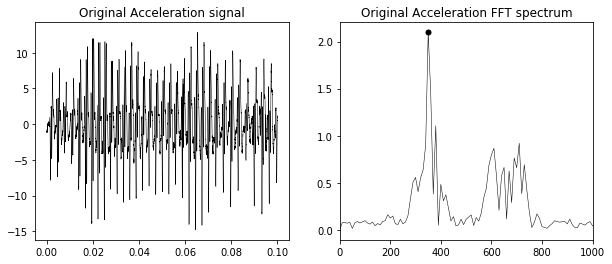

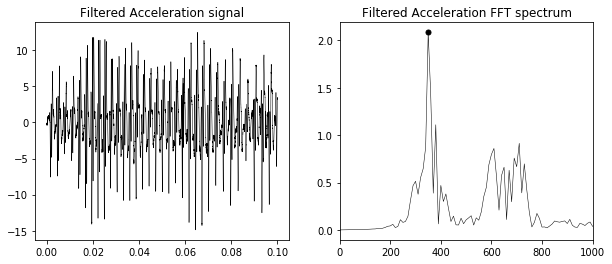

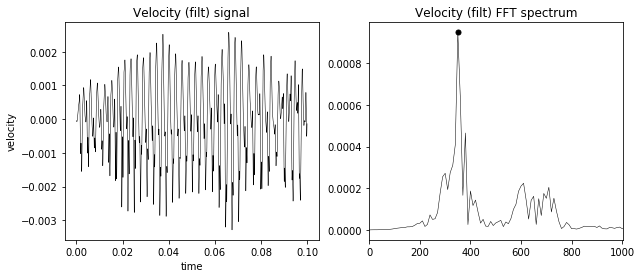

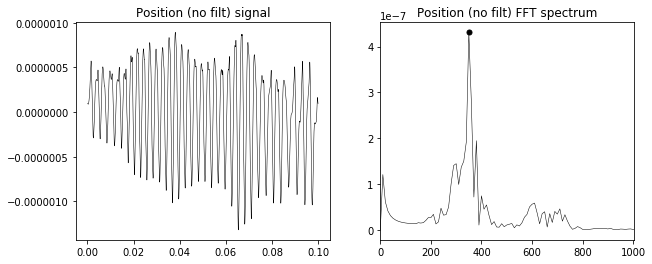

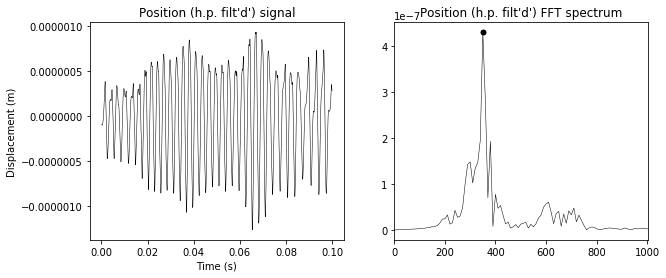

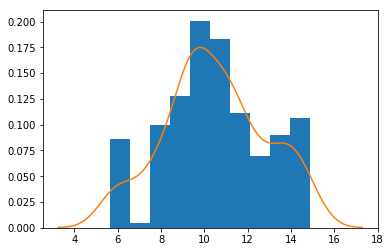

9.076981710313342e-07


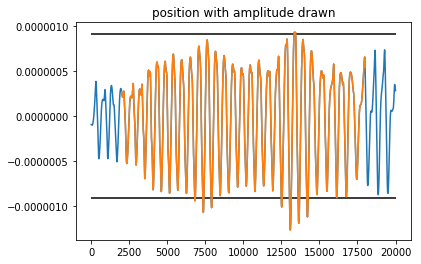

In [121]:

timesteps = np.array(range(len(exx)))/ float(log_rate)
sig = data

# timesteps = np.linspace(0, 0.1, num = 20000)
# sig = 3.0*np.sin(369*2*np.pi*(timesteps + 0.003)) 

sigProc = fft_(timesteps, sig)
sigProc.fft_fit(sigProc.sigl)
sigProc.plot_fft(title = "Original Acceleration")


sigProc.filterAcc()
#plt.plot(sigProc.newSig)
sigProc.fft_fit(sigProc.filtered_acc)
sigProc.plot_fft(title = "Filtered Acceleration")


sigProc.doubleIntegrate(sigProc.filtered_sigl)
sigProc.fft_fit(sigProc.vel)
sigProc.plot_fft(title =  "Velocity (filt)", xlabel = "time",ylabel = "velocity")


sigProc.fft_fit(sigProc.pos_unfilt)
sigProc.plot_fft(title =  "Position (no filt)")

sigProc.fft_fit(sigProc.pos)
sigProc.plot_fft(title =  "Position (h.p. filt'd')", xlabel = "Time (s)", ylabel = "Displacement (m)")


# envelope
accMxs = pd.Series(abs(sigProc.filtered_acc -np.mean(sigProc.filtered_acc))).rolling(int(700), center = True, min_periods = 1).max().tolist()
# plt.plot(abs(sigProc.filtered_acc -np.mean(sigProc.filtered_acc)))
# plt.plot(accMxs)
# plt.show()


zz = np.array(accMxs)
plt.hist(zz[zz < 20], density = True, bins = 10)
sns.kdeplot(zz[zz < 20], bw=0.8)
plt.show()


aa = np.array(np.where((np.array(accMxs) > 2.0) & (np.arange(0, len(accMxs)) < 18000) & (np.arange(0, len(accMxs)) > 2000)))
bb = aa.flatten()





if bb.shape[0] > 0:
    
    mxs = pd.Series(abs(sigProc.pos - np.mean(sigProc.pos[bb]))).rolling(int(700), center = True, min_periods = 1).max().tolist()
    # plt.plot(abs(sigProc.pos -np.mean(sigProc.pos)))
    # plt.plot(mxs)
    # plt.show()

    plt.plot(sigProc.pos - np.mean(sigProc.pos[bb]) )
    plt.title("position with amplitude drawn")


    plt.plot(bb, sigProc.pos[bb] - np.mean(sigProc.pos[bb]))

    maxCut = np.array(mxs)[bb]
    mm = np.mean(np.unique(maxCut))

    plt.hlines(xmin = 0, xmax = 20000, y = [mm, - mm])
    print(np.mean(np.unique(mm)))
else:
    print("signal didn't go over amp threshold")

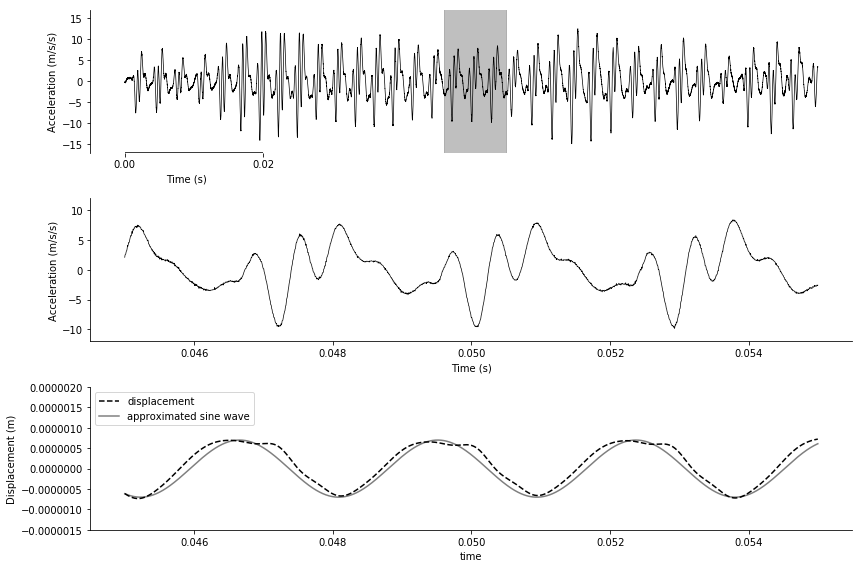

In [416]:
# Two subplots, unpack the axes array immediately
f, (ax, ax2, ax3) = plt.subplots(3, 1, sharey=False, figsize=(12,8))



ax.plot(timesteps, sigProc.filtered_acc - np.mean(sigProc.filtered_acc[bb]), c= "black", linewidth = 0.7)
ax.set_ylabel("Acceleration (m/s/s)")
ax.set_xlabel("Time (s)                                                                                                                                                                                      ")


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.hlines(y = -17, xmin = 0, xmax = 0.02)
ax.set_ylim([-17,17])
ax.axes.xaxis.set_ticks([0,0.02])
ax.axvspan(0.046, 0.055, ymin=-20, ymax=17, alpha=0.5, color='grey')

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
#ax.xaxis.set_ticks_position('bottom')

ax2.plot(timesteps[9000:11000], (sigProc.filtered_acc - np.mean(sigProc.filtered_acc))[9000:11000], c= "black", linewidth = 0.7)
ax2.set_ylabel("Acceleration (m/s/s)")
ax2.set_xlabel("Time (s)")                


# Hide the right and top spines
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_ylim(np.array([-12,12]))
#ax2.spines['left'].set_visible(False)

# Only show ticks on the left and bottom spines
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')

ax3.plot(timesteps[9000:11000],(sigProc.pos - np.percentile(sigProc.pos[9000: 11000],  44))[9000: 11000], c = 'black', label = "displacement", linestyle = "--" )
# plt.title("position with amplitude drawn")

ax3.plot(timesteps[9000:11000],7*10**-7*np.sin(2*np.pi*350 * (timesteps[9000:11000] + 2.44*np.pi)), 
         c= 'black', alpha = 0.5, label = "approximated sine wave", linestyle = "-")
ax3.legend(loc = 2)
ax3.set_ylim(np.array([-15,20])*10**-7)
ax3.set_ylabel("Displacement (m)")
ax3.set_xlabel("time")
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)



plt.tight_layout()

# plt.savefig("D:/Dropbox/SonicationBehavior/SonBehFigs/ExampleSpectrum_amp3.pdf", width = 7, height = 1.5)
# plt.savefig("D:/Dropbox/SonicationBehavior/SonBehFigs/ExampleSpectrum_amp3.svg", width = 7, height = 1.5)
f.savefig("D:/Dropbox/SonicationBehavior/SonBehFigs/Accel_andPos.png", width = 7, height = 5, dpi = 500)
f.savefig("D:/Dropbox/SonicationBehavior/SonBehFigs/Accel_andPos.svg", width = 7, height = 5)

plt.show()

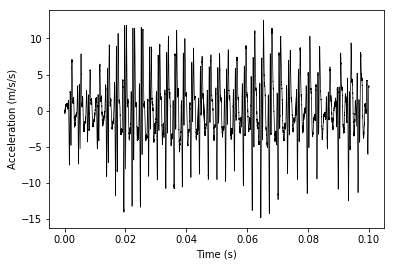

Text(0.5,0,'Time (s)')

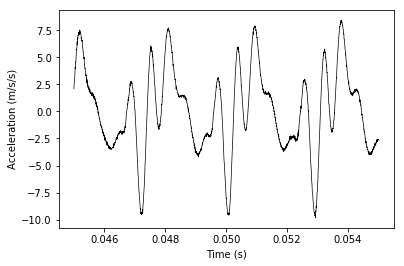

In [124]:
plt.plot(timesteps, sigProc.filtered_acc - np.mean(sigProc.filtered_acc[bb]), c= "black", linewidth = 0.7)
#plt.title("position with amplitude drawn")
plt.ylabel("Acceleration (m/s/s)")
plt.xlabel("Time (s)")

plt.show()
plt.plot(timesteps[9000:11000], (sigProc.filtered_acc - np.mean(sigProc.filtered_acc))[9000:11000], c= "black", linewidth = 0.7)
#plt.title("position with amplitude drawn")
plt.ylabel("Acceleration (m/s/s)")
plt.xlabel("Time (s)")

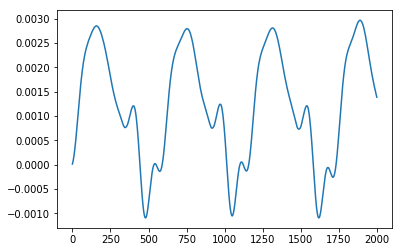

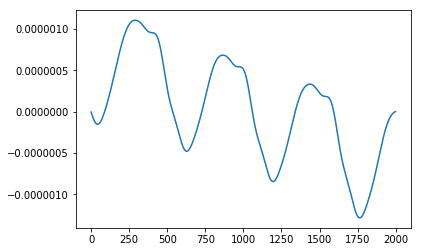

In [125]:
ss = (sigProc.filtered_acc - np.mean(sigProc.filtered_acc))[9000:11000]
vv = np.cumsum(ss)/sigProc.log_rate
plt.plot(vv)
plt.show()
disp = np.cumsum(vv - np.mean(vv))/sigProc.log_rate

plt.plot(disp)

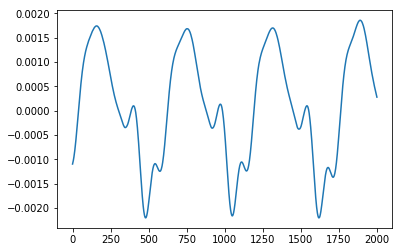

In [126]:
plt.plot(sigProc.vel[9000:11000])

Text(0.5,0,'Time (s)')

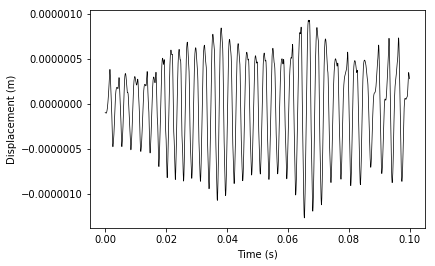

In [127]:
plt.plot(timesteps, sigProc.pos - np.mean(sigProc.pos[bb]), c= "black", linewidth = 0.7)
#plt.title("position with amplitude drawn")
plt.ylabel("Displacement (m)")
plt.xlabel("Time (s)")

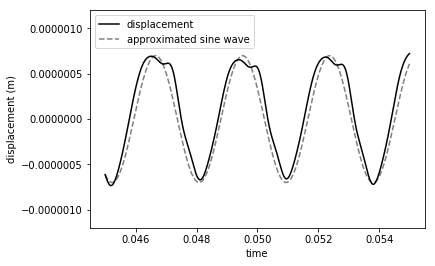

In [199]:
plt.plot(timesteps[9000:11000],(sigProc.pos - np.percentile(sigProc.pos[9000: 11000],  44))[9000: 11000], c = 'black', label = "displacement" )
# plt.title("position with amplitude drawn")

plt.plot(timesteps[9000:11000],7*10**-7*np.sin(2*np.pi*350 * (timesteps[9000:11000] + 2.44*np.pi)), 
         c= 'black', alpha = 0.5, label = "approximated sine wave", linestyle = "--")
plt.legend(loc = 2)
plt.ylim(np.array([-12,12])*10**-7)
plt.ylabel("displacement (m)")
plt.xlabel("time")
plt.show()

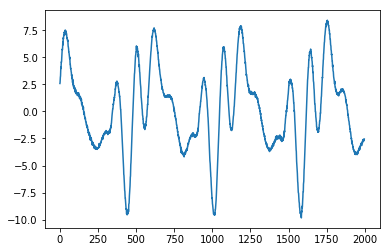

In [200]:
# recover acc from position

plt.plot(np.diff(np.diff((sigProc.pos - np.percentile(sigProc.pos[9000: 11000],  45))[9000: 11000]))*sigProc.log_rate*sigProc.log_rate)

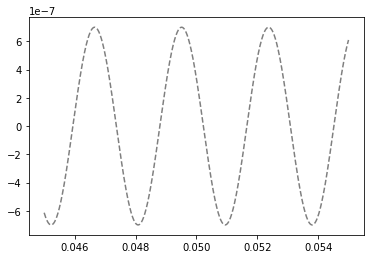

In [215]:
ts = timesteps[9000:11000]
disp = 7*10**-7*np.sin(2*np.pi*350 * (timesteps[9000:11000] + 2.44*np.pi))

def convertPosToAcc(dat, log_rate):
    return(np.append([np.nan, np.nan], np.diff(np.diff(dat))*log_rate*log_rate, axis = 0))

def convertPosToVel(dat, log_rate):
    return(np.append([np.nan], np.diff(dat)*log_rate, axis = 0))


plt.plot(ts, disp, 
         c= 'black', alpha = 0.5, label = "approximated sine wave", linestyle = "--")

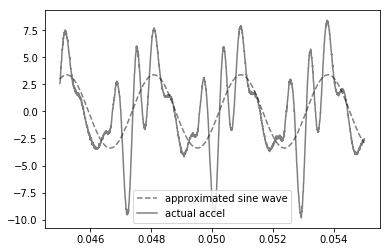

In [216]:
actSignal = sigProc.pos[9000: 11000]

plt.plot(ts, convertPosToAcc(disp, sigProc.log_rate), 
         c= 'black', alpha = 0.5, label = "approximated sine wave", linestyle = "--")
plt.plot(ts, convertPosToAcc(actSignal, sigProc.log_rate), 
         c= 'black', alpha = 0.5, label = "actual accel", linestyle = "-")
plt.legend()

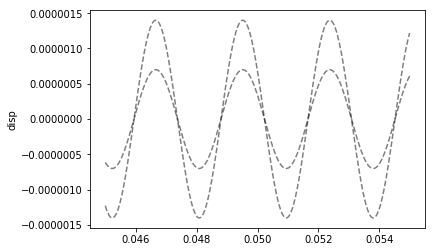

Text(0.5,0,'time')

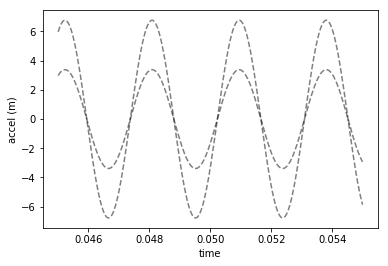

In [217]:
# If a bee mantains constant frequency, but doubles positional amplitude, then 
# acceleration amplitude also doubles
disp = 7*10**-7*np.sin(2*np.pi*350 * (timesteps[9000:11000] + 2.44*np.pi))
plt.plot(ts, disp, 
         c= 'black', alpha = 0.5, label = "approximated sine wave", linestyle = "--")

disp = 14*10**-7*np.sin(2*np.pi*350 * (timesteps[9000:11000] + 2.44*np.pi))

plt.plot(ts, disp, 
         c= 'black', alpha = 0.5, label = "approximated sine wave", linestyle = "--")
plt.ylabel("disp")
plt.show()

disp = 7*10**-7*np.sin(2*np.pi*350 * (timesteps[9000:11000] + 2.44*np.pi))
plt.plot(ts, convertPosToAcc(disp, sigProc.log_rate), 
         c= 'black', alpha = 0.5, label = "approximated sine wave", linestyle = "--")
disp = 14*10**-7*np.sin(2*np.pi*350 * (timesteps[9000:11000] + 2.44*np.pi))
plt.plot(ts, convertPosToAcc(disp, sigProc.log_rate), 
         c= 'black', alpha = 0.5, label = "approximated sine wave", linestyle = "--")
plt.ylabel("accel (m)")
plt.xlabel("time")

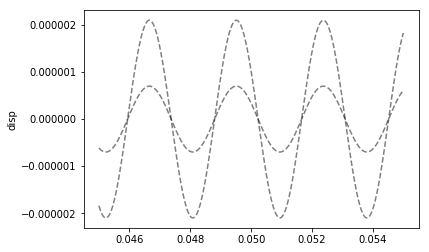

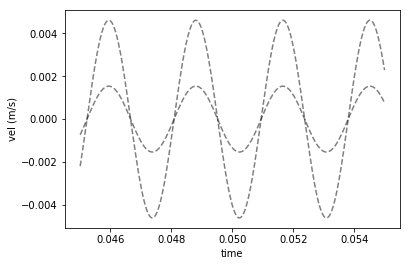

Text(0.5,0,'time')

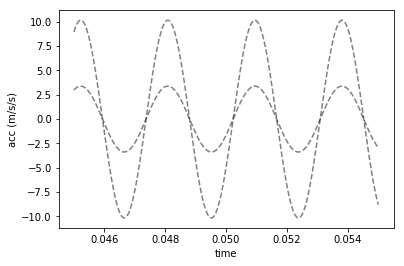

In [230]:
# If a bee mantains constant frequency, but doubles velocity amplitude, then 
# acceleration velocity also doubles
disp = 7*10**-7*np.sin(2*np.pi*350 * (timesteps[9000:11000] + 2.44*np.pi))
plt.plot(ts, disp, 
         c= 'black', alpha = 0.5, label = "approximated sine wave", linestyle = "--")

disp = 3*7*10**-7*np.sin(2*np.pi*350 * (timesteps[9000:11000] + 2.44*np.pi))

plt.plot(ts, disp, 
         c= 'black', alpha = 0.5, label = "approximated sine wave", linestyle = "--")
plt.ylabel("disp")
plt.show()

disp = 7*10**-7*np.sin(2*np.pi*350 * (timesteps[9000:11000] + 2.44*np.pi))
plt.plot(ts, convertPosToVel(disp, sigProc.log_rate), 
         c= 'black', alpha = 0.5, label = "approximated sine wave", linestyle = "--")
disp = 3*7*10**-7*np.sin(2*np.pi*350 * (timesteps[9000:11000] + 2.44*np.pi))
plt.plot(ts, convertPosToVel(disp, sigProc.log_rate), 
         c= 'black', alpha = 0.5, label = "approximated sine wave", linestyle = "--")
plt.ylabel("vel (m/s)")
plt.xlabel("time")
plt.show()

disp = 7*10**-7*np.sin(2*np.pi*350 * (timesteps[9000:11000] + 2.44*np.pi))
plt.plot(ts, convertPosToAcc(disp, sigProc.log_rate), 
         c= 'black', alpha = 0.5, label = "approximated sine wave", linestyle = "--")
disp = 3*7*10**-7*np.sin(2*np.pi*350 * (timesteps[9000:11000] + 2.44*np.pi))
plt.plot(ts, convertPosToAcc(disp, sigProc.log_rate), 
         c= 'black', alpha = 0.5, label = "approximated sine wave", linestyle = "--")
plt.ylabel("acc (m/s/s)")
plt.xlabel("time")

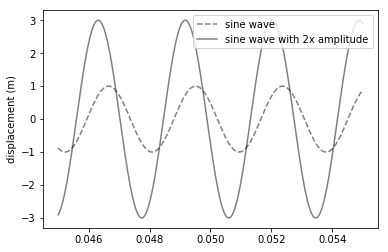

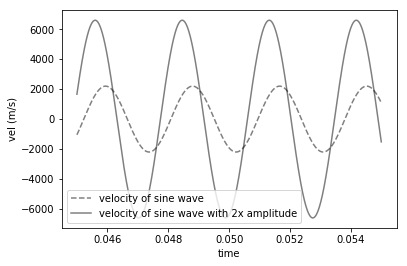

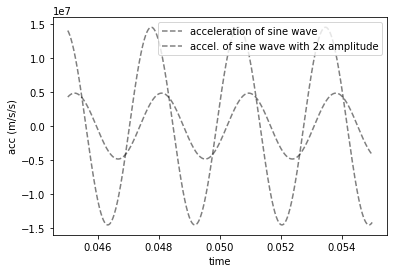

In [325]:
# If you doulbe position amplitude, and hold frequ constant, what happens?

## double velocity amplitude & double acceleration amplitude


disp = np.sin(2*np.pi*350 * (timesteps[9000:11000] + 2.44*np.pi))
disp2 = 3*np.sin(2*np.pi*350* (timesteps[9000:11000] + 2.17*np.pi))



plt.plot(ts, disp, 
         c= 'black', alpha = 0.5, label = "sine wave", linestyle = "--")
plt.plot(ts, disp2, 
         c= 'black', alpha = 0.5, label = "sine wave with 2x amplitude", linestyle = "-")
plt.ylabel("displacement (m)")
plt.legend()
plt.show()

plt.plot(ts, convertPosToVel(disp, sigProc.log_rate), 
         c= 'black', alpha = 0.5, label = "velocity of sine wave", linestyle = "--")
plt.plot(ts, convertPosToVel(disp2, sigProc.log_rate), 
         c= 'black', alpha = 0.5, label = "velocity of sine wave with 2x amplitude", linestyle = "-")
plt.ylabel("vel (m/s)")
plt.xlabel("time")
plt.legend()
plt.show()


plt.plot(ts, convertPosToAcc(disp, sigProc.log_rate), 
         c= 'black', alpha = 0.5, label = "acceleration of sine wave", linestyle = "--")
plt.plot(ts, convertPosToAcc(disp2, sigProc.log_rate), 
         c= 'black', alpha = 0.5, label = "accel. of sine wave with 2x amplitude", linestyle = "--")
plt.ylabel("acc (m/s/s)")
plt.xlabel("time")

plt.legend()

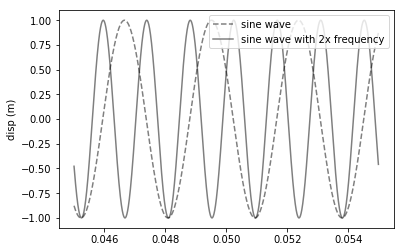

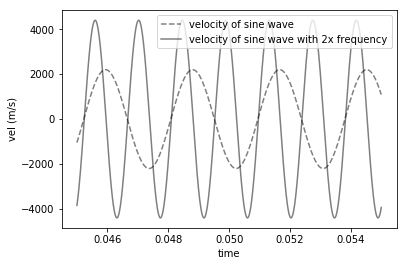

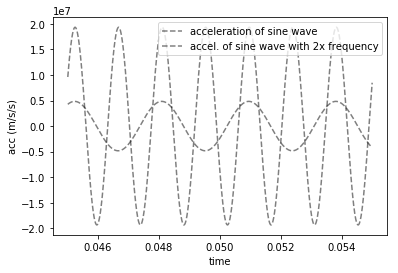

In [327]:
# If you double frequency, and hold position amplitude constant, what happens?

## double velocity amplitude & quadrulple amplitude


disp = np.sin(2*np.pi*350 * (timesteps[9000:11000] + 2.44*np.pi))
disp2 = np.sin(2*np.pi*350*2* (timesteps[9000:11000] + 2.17*np.pi))



plt.plot(ts, disp, 
         c= 'black', alpha = 0.5, label = "sine wave", linestyle = "--")
plt.plot(ts, disp2, 
         c= 'black', alpha = 0.5, label = "sine wave with 2x frequency", linestyle = "-")
plt.ylabel("disp (m)")
plt.legend(loc= 1)
plt.show()

plt.plot(ts, convertPosToVel(disp, sigProc.log_rate), 
         c= 'black', alpha = 0.5, label = "velocity of sine wave", linestyle = "--")
plt.plot(ts, convertPosToVel(disp2, sigProc.log_rate), 
         c= 'black', alpha = 0.5, label = "velocity of sine wave with 2x frequency", linestyle = "-")
plt.ylabel("vel (m/s)")
plt.xlabel("time")
plt.legend(loc= 1)
plt.show()


plt.plot(ts, convertPosToAcc(disp, sigProc.log_rate), 
         c= 'black', alpha = 0.5, label = "acceleration of sine wave", linestyle = "--")
plt.plot(ts, convertPosToAcc(disp2, sigProc.log_rate), 
         c= 'black', alpha = 0.5, label = "accel. of sine wave with 2x frequency", linestyle = "--")
plt.ylabel("acc (m/s/s)")
plt.xlabel("time")
plt.legend(loc= 1)
plt.show()

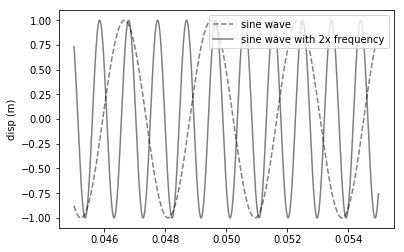

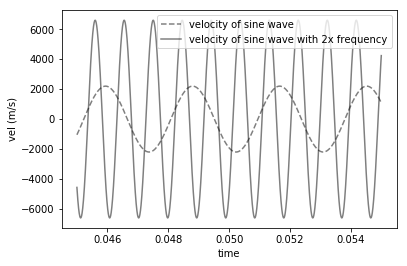

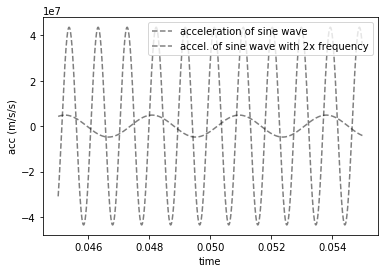

In [331]:
# If you triple frequency, and hold position amplitude constant, what happens?

## triple velocity amplitude & 9X (3^2) amplitude


disp = np.sin(2*np.pi*350 * (timesteps[9000:11000] + 2.44*np.pi))
disp2 = np.sin(2*np.pi*350*3* (timesteps[9000:11000] + 2.17*np.pi))



plt.plot(ts, disp, 
         c= 'black', alpha = 0.5, label = "sine wave", linestyle = "--")
plt.plot(ts, disp2, 
         c= 'black', alpha = 0.5, label = "sine wave with 2x frequency", linestyle = "-")
plt.ylabel("disp (m)")
plt.legend(loc= 1)
plt.show()

plt.plot(ts, convertPosToVel(disp, sigProc.log_rate), 
         c= 'black', alpha = 0.5, label = "velocity of sine wave", linestyle = "--")
plt.plot(ts, convertPosToVel(disp2, sigProc.log_rate), 
         c= 'black', alpha = 0.5, label = "velocity of sine wave with 2x frequency", linestyle = "-")
plt.ylabel("vel (m/s)")
plt.xlabel("time")
plt.legend(loc= 1)
plt.show()


plt.plot(ts, convertPosToAcc(disp, sigProc.log_rate), 
         c= 'black', alpha = 0.5, label = "acceleration of sine wave", linestyle = "--")
plt.plot(ts, convertPosToAcc(disp2, sigProc.log_rate), 
         c= 'black', alpha = 0.5, label = "accel. of sine wave with 2x frequency", linestyle = "--")
plt.ylabel("acc (m/s/s)")
plt.xlabel("time")
plt.legend(loc= 1)
plt.show()

In [335]:
0.5 * 9

4.5

In [336]:
def convertAccToVel(acc, log_rate):
    vel = np.cumsum(acc - np.mean(acc))/log_rate
    vel = vel - np.mean(vel)
    return(vel)


def convertAccToPos(acc, log_rate):
    vel = np.cumsum(acc - np.mean(acc))/log_rate
    pos = np.cumsum(vel - np.mean(vel))/log_rate
    pos = pos -np.mean(pos)
    return(pos)

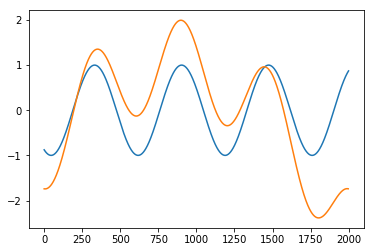

In [337]:
plt.plot(disp)

acc = convertPosToAcc(disp, sigProc.log_rate)
acc = acc[~np.isnan(acc)]
plt.plot(convertAccToPos(acc, sigProc.log_rate))

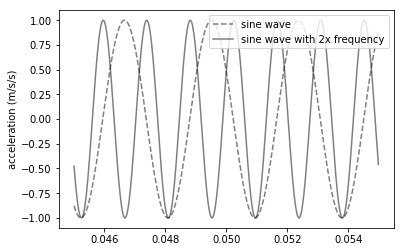

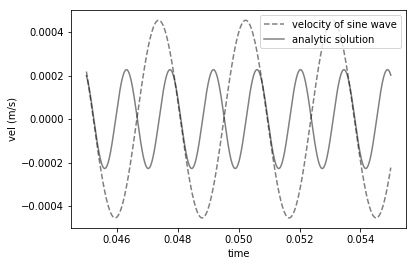

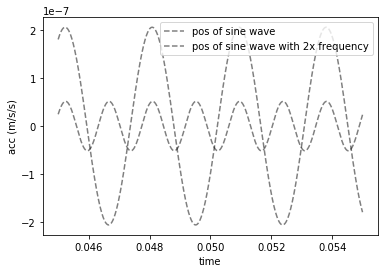

In [338]:
# If you keep acc amplitude constant and double frequency, what happens?

## halve velocity amplitude, divide position amplitude by 4 (2^2)


acc = np.sin(2*np.pi*350 * (timesteps[9000:11000] + 2.44*np.pi))
acc2 = np.sin(2*np.pi*350*2* (timesteps[9000:11000] + 2.17*np.pi))



plt.plot(ts, acc, 
         c= 'black', alpha = 0.5, label = "sine wave", linestyle = "--")
plt.plot(ts, acc2, 
         c= 'black', alpha = 0.5, label = "sine wave with 2x frequency", linestyle = "-")
plt.ylabel("acceleration (m/s/s)")
plt.legend(loc= 1)
plt.show()



analyticSolution = -(1/(2*np.pi*350))*np.cos(2*np.pi*350* (timesteps[9000:11000] + 2.44*np.pi))

# plt.plot(ts, convertAccToVel(acc, sigProc.log_rate), 
#          c= 'black', alpha = 0.5, label = "velocity of sine wave", linestyle = "--")
plt.plot(ts, analyticSolution, 
         c= 'black', alpha = 0.5, label = "velocity of sine wave", linestyle = "--")

analyticSolution2 = -(1/(2*2*np.pi*350))*np.cos(2*np.pi*350*2* (timesteps[9000:11000] + 2.17*np.pi))

# plt.plot(ts, convertAccToVel(acc2, sigProc.log_rate), 
#          c= 'black', alpha = 0.5, label = "numerical solution", linestyle = "-")
plt.plot(ts, analyticSolution2, 
          alpha = 0.5, label = "analytic solution", linestyle = "-", color= 'black')
plt.ylabel("vel (m/s)")
plt.xlabel("time")
plt.legend(loc= 1)
plt.show()



analyticSolution = -(1/(2*np.pi*350))* (1/(2*np.pi*350))*np.sin(2*np.pi*350* (timesteps[9000:11000] + 2.44*np.pi))
plt.plot(ts, analyticSolution, 
         c= 'black', alpha = 0.5, label = "pos of sine wave", linestyle = "--")

analyticSolution2 = -(1/(2*2*np.pi*350))* (1/(2*2*np.pi*350))*np.sin(2*np.pi*350*2* (timesteps[9000:11000] + 2.17*np.pi))

plt.plot(ts, analyticSolution2, 
         c= 'black', alpha = 0.5, label = "pos of sine wave with 2x frequency", linestyle = "--")
plt.ylabel("acc (m/s/s)")
plt.xlabel("time")
plt.legend(loc= 1)
plt.show()

In [ ]:
print(beeFrqPwr)

In [ ]:
#fft practice
xx = np.linspace(0, 0.1, num = 1000)
act = 2.09906008*np.sin(350*2*np.pi*xx) 
#plt.plot(xx, act)

log_rate = len(xx)*(1/(np.max(xx)))

n =len(act) # length of the signal
k = np.arange(n, step = 1)
T = n/log_rate
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range

Y = np.fft.fft(act)/n *2 # fft computing and normalization
Y = Y[range(int(n/2))]

# calculate top frequency
ind = np.argpartition(abs(Y), -4)[-4:]
# Find highest point on the spectrum
peakFrq = frq[ind[::-1]]
pwr = (abs(Y)[ind[::-1]])
domPK = [x for (y,x) in sorted(zip(pwr,peakFrq), reverse = True)][0]

beeFrqPwr = pwr[peakFrq == domPK]

plt.figure(figsize=(10,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[2,2]) 

# create subplot 1
ax1 = plt.subplot(gs[0])

ax1.plot(xx,act,color = 'black', linewidth=0.5 )

ax2 = plt.subplot(gs[1])
ax2.plot(frq,abs(Y), color = "black", linewidth=0.5)
ax2.plot(domPK, beeFrqPwr,'o', color = 'black', markersize = 5)

ax2.set_xlim(-0, 1003)
print(beeFrqPwr)


In [ ]:
# calculate velocity and position spectrum
# ignore divide by 0 error
np.seterr(divide='ignore', invalid='ignore')

frequency = frq
ampSpec = abs(Y)
omega = (domPK*2*np.pi)

velocSpec = ampSpec / (frequency*2*np.pi)

posSpec = velocSpec / (frequency*2*np.pi)

plt.plot(frequency, posSpec)
plt.xlim(300, 500)
plt.ylim(0, 0.000001)
plt.title("position spectrum")
plt.show()
print(np.max(posSpec[frequency > 300]))



In [ ]:
posSig = -beeFrqPwr*np.sin(domPK*2*np.pi*xx)  / ((domPK*2*np.pi)**2)
plt.plot(xx, posSig)
print(beeFrqPwr / ((domPK*2*np.pi)**2))

In [ ]:
#fft practice
#xx = np.linspace(0, 0.1, num = 10000)
act = 2.09906008*np.sin(350*2*np.pi*xx) 
#plt.plot(xx, act)

#log_rate = 1000*10.0

n =len(act) # length of the signal
k = np.arange(n, step = 1)
T = n/log_rate
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range

Y = np.fft.fft(act)/n *2 # fft computing and normalization
Y = Y[range(int(n/2))]

# calculate top frequency
ind = np.argpartition(abs(Y), -4)[-4:]
# Find highest point on the spectrum
peakFrq = frq[ind[::-1]]
pwr = (abs(Y)[ind[::-1]])
domPK = [x for (y,x) in sorted(zip(pwr,peakFrq), reverse = True)][0]

beeFrqPwr = pwr[peakFrq == domPK]

plt.figure(figsize=(10,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[2,2]) 

# create subplot 1
ax1 = plt.subplot(gs[0])

ax1.plot(xx,act,color = 'black', linewidth=0.5 )

ax2 = plt.subplot(gs[1])
ax2.plot(frq,abs(Y), color = "black", linewidth=0.5)
ax2.plot(domPK, beeFrqPwr,'o', color = 'black', markersize = 5)

ax2.set_xlim(-0, 1003)
print(beeFrqPwr)



In [ ]:
# double check numerical integral
#act = 7*np.sin(350*2*np.pi*xx) 

plt.plot(act)
#plt.plot(data)
plt.show()

vel = np.cumsum(act-np.mean(act))/log_rate
vel = vel - np.mean(vel)

plt.plot(vel)
plt.show()

pos = np.cumsum(vel-np.mean(vel))/log_rate
pos = pos - np.mean(pos)

plt.plot(pos)
plt.hlines(y = beeFrqPwr / ((domPK*2*np.pi)**2), xmin = 0, xmax = len(xx))
plt.show()


act1 = pos
#plt.plot(xx, act)

#log_rate = 1000*10.0

n =len(act1) # length of the signal
k = np.arange(n, step = 1)
T = n/log_rate
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range

Y = np.fft.fft(act1)/n *2 # fft computing and normalization
Y = Y[range(int(n/2))]

# calculate top frequency
ind = np.argpartition(abs(Y), -4)[-4:]
# Find highest point on the spectrum
peakFrq = frq[ind[::-1]]
pwr = (abs(Y)[ind[::-1]])
domPK = [x for (y,x) in sorted(zip(pwr,peakFrq), reverse = True)][0]

beeFrqPwr = pwr[peakFrq == domPK]
pos_pwr = beeFrqPwr

plt.figure(figsize=(10,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[2,2]) 

# create subplot 1
ax1 = plt.subplot(gs[0])

ax1.plot(xx,act1,color = 'black', linewidth=0.5 )

ax2 = plt.subplot(gs[1])
ax2.plot(frq,abs(Y), color = "black", linewidth=0.5)
ax2.plot(domPK, beeFrqPwr,'o', color = 'black', markersize = 5)

ax2.set_xlim(-0, 1003)
print(beeFrqPwr)

In [ ]:
#fft practice
xx = np.linspace(0, 0.1, num = len(data))
act = data-np.mean(data)
#plt.plot(xx, act)

log_rate = 200000.0

n =len(act) # length of the signal
k = np.arange(n, step = 1)
T = n/log_rate
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range

Y = np.fft.fft(act)/n # fft computing and normalization
Y = Y[range(int(n/2))]*2

# calculate top frequency
ind = np.argpartition(abs(Y), -4)[-4:]
# Find highest point on the spectrum
peakFrq = frq[ind[::-1]]
pwr = (abs(Y)[ind[::-1]])
domPK = [x for (y,x) in sorted(zip(pwr,peakFrq), reverse = True)][0]

beeFrqPwr = pwr[peakFrq == domPK]

plt.figure(figsize=(10,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[2,2]) 

# create subplot 1
ax1 = plt.subplot(gs[0])

ax1.plot(xx,act,color = 'black', linewidth=0.5 )

ax2 = plt.subplot(gs[1])
ax2.plot(frq,abs(Y), color = "black", linewidth=0.5)
ax2.plot(domPK, beeFrqPwr,'o', color = 'black', markersize = 5)

ax2.set_xlim(-3, 1003)
print(beeFrqPwr)


In [ ]:


act = data-np.mean(data)
#plt.plot(xx, act)

log_rate = 200000.0

n =len(act) # length of the signal
k = np.arange(n, step = 1)
T = n/log_rate
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range

Y = np.fft.fft(act)/n # fft computing and normalization
Y = Y[range(int(n/2))]*2


#compare to analytical solution
frequency = frq
ampSpec = abs(Y)
omega = (domPK*2*np.pi)
plt.plot(frequency, ampSpec)
plt.title("acceleration spectrum")
plt.xlim(200, 1000)
plt.show()

velocSpec = ampSpec / (frq*2*np.pi)
plt.plot(frequency, velocSpec)
plt.xlim(200, 1000)
plt.title("velocity spectrum")
plt.show()

posSpec = velocSpec / (frq*2*np.pi)
#plt.vlines(ymin =0 , ymax = 0.00002, x = 350, colors = 'grey')
plt.hlines(xmin = 200, xmax = 1000, y = pos_pwr , colors= 'grey')
plt.plot(frequency, posSpec)
plt.xlim(200, 1000)
plt.ylim(0, pos_pwr)
plt.title("position spectrum")

plt.show()
print(pos_pwr)


In [ ]:
# See how fft works with partial signal

#fft practice
xx = np.linspace(0, 0.1, num = 10000)
act = 2.09906008*np.sin(350*2*np.pi*xx) * (xx > 0.09) + 0.5*np.sin(1000*2*np.pi*xx)

#plt.plot(xx, act)

#log_rate = 1000*10.0

n =len(act) # length of the signal
k = np.arange(n, step = 1)
T = n/log_rate
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range

Y = np.fft.fft(act)/n *2 # fft computing and normalization
Y = Y[range(int(n/2))]

# calculate top frequency
ind = np.argpartition(abs(Y), -4)[-4:]
# Find highest point on the spectrum
peakFrq = frq[ind[::-1]]
pwr = (abs(Y)[ind[::-1]])
domPK = [x for (y,x) in sorted(zip(pwr,peakFrq), reverse = True)][0]

beeFrqPwr = pwr[peakFrq == domPK]

plt.figure(figsize=(10,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[2,2]) 

# create subplot 1
ax1 = plt.subplot(gs[0])

ax1.plot(xx,act,color = 'black', linewidth=0.5 )

ax2 = plt.subplot(gs[1])
ax2.plot(frq,abs(Y), color = "black", linewidth=0.5)
ax2.plot(domPK, beeFrqPwr,'o', color = 'black', markersize = 5)

ax2.set_xlim(-0, 1003)
print(beeFrqPwr)



In [ ]:
def readMyFile(filename):
    
    '''Read in csv 10x faster than pandas'''
    
    tmpdta = []
 
    with open(filename, newline="\n") as csvDataFile:
        csvReader = csv.reader(csvDataFile, delimiter=' ', quoting=csv.QUOTE_NONNUMERIC)
        for row in csvReader:
            tmpdta.append(row)
 
    return(pd.DataFrame(np.transpose(tmpdta)))

In [ ]:
# fft class

class fft_:
    
    '''
    Does fft spectrum with accelerometer data
    
    '''
    
    def fit(self, timesteps, signal):
        self.timesteps = timesteps
        self.signal = signal - np.mean(signal)

        log_rate = len(self.timesteps)*(1/(np.round(np.max(self.timesteps), decimals = 1)))

        n =len(self.signal) # length of the signal
        k = np.arange(n, step = 1)
        T = n/log_rate
        frq = k/T # two sides frequency range
        frq = frq[range(int(n/2))] # one side frequency range

        # fft computing and normalization (note that *2 is so that it is scaled properly)
        Y = np.fft.fft(self.signal)/n *2 
        Y = Y[range(int(n/2))]

        # calculate top frequency
        ind = np.argpartition(abs(Y), -4)[-4:]
        
        # Find highest point on the spectrum
        self.peakFrq = frq[ind[::-1]]
        self.pwr = (abs(Y)[ind[::-1]])
        
        self.dominant_freq = [x for (y,x) in sorted(zip(self.pwr,self.peakFrq), reverse = True)][0]
        self.max_amp = self.pwr[self.peakFrq == self.dominant_freq]
        self.Y = Y
        self.frq = frq
        
        # calculate spectrum for position
#         ampSpec = abs(self.Y)
#         velocSpec = ampSpec / (self.frq*2*np.pi)
#         self.posSpec = velocSpec / (self.frq*2*np.pi)
        
#         self.posSpec = self.posSpec[self.frq > 150]
#         self.frq2 = self.frq[self.frq > 150]
        
#         # calculate top frequency
#         ind2 = np.argpartition(self.posSpec, -4)[-4:]
        
#         # Find highest point on the spectrum
#         self.peakFrq_pos = self.frq2[ind2[::-1]]
#         self.pwr_pos = (self.posSpec[ind2[::-1]])
        
#         self.dominant_freq_pos = [x for (y,x) in sorted(zip(self.pwr_pos,self.peakFrq_pos), reverse = True)][0]
#         self.max_amp_pos = self.pwr_pos[self.peakFrq_pos == self.dominant_freq_pos]
        
        self.amp_pos = self.max_amp/(self.dominant_freq * 2 * np.pi)**2
        
        
        
    def plot_fft(self):    
        plt.figure(figsize=(10,4))
        gs = gridspec.GridSpec(1, 2, width_ratios=[2,2]) 

        # create subplot 1
        ax1 = plt.subplot(gs[0])
        ax1.plot(self.timesteps,self.signal, color = 'black', linewidth=0.5)
    
        # subplot 2
        ax2 = plt.subplot(gs[1])
        ax2.plot(self.frq, abs(self.Y), color = "black", linewidth=0.5)
        ax2.plot(self.dominant_freq, self.max_amp,'o', color = 'black', markersize = 5)
        ax2.set_xlim(-0, 1003)
        
        
#         ax3 = plt.subplot(gs[2])
#         ax3.plot(self.frq2, self.posSpec, color = "black", linewidth=0.5)
#         ax3.plot(self.dominant_freq_pos, self.max_amp_pos,'o', color = 'black', markersize = 5)
#         ax3.set_xlim(-0, 1003)
        
#         print(self.dominant_freq_pos, self.max_amp_pos, self.max_amp/(self.dominant_freq * 2 * np.pi)**2)
        plt.show()

In [ ]:
# forget about envelope for now -- just find position amplitude for all recordings
HeavyLight = "/Users/cswitzer/Dropbox/SonicationBehavior/SonBehData/02_HeavyLight_cleaned.csv"
hl = pd.read_csv(HeavyLight)

dd = "/Users/cswitzer/Dropbox/SonicationBehavior/SonBehData/SonicationBehavior_HeavyLight/"

allFolders = np.unique(hl.accFileAndFolder)


for foldNum in range(len(allFolders)):
    tmpF = os.path.join(dd, allFolders[foldNum])
    tmpDF = pd.read_csv(tmpF, header = None)
    tmpDF.columns = ["frq", "MaxMinAmp", "fname_short", "dd", "TT", "AA", "BB"]
    tmpDF.fname_short = [ff.strip() for ff in tmpDF.fname_short]



    fold = os.path.join(dd, allFolders[foldNum]).split("_ampFreq.txt")[0]

    accRecs = [f for f in os.listdir(fold) if not f.startswith(".") ]



    for ii in range(len(accRecs)):
        # read in data
        ar = accRecs[ii]
        tmpdf1 = readMyFile(os.path.join(fold, ar))

        # compute fft and save
        fft = fft_()

        # convert signal to m/s/s (*1000 / 10.17)
        fft.fit(timesteps = tmpdf1.iloc[:,0 ], signal = np.array(tmpdf1.iloc[:,1]*1000 / 10.17))
        #print(fft.dominant_freq, fft.max_amp)

        if ii == 0:
            tmpDF2 = np.hstack([ar, fft.dominant_freq, fft.max_amp[0], fft.amp_pos])

        else:
            tmpDF2 = np.vstack([tmpDF2, np.hstack([ar, int(fft.dominant_freq), fft.max_amp[0], fft.amp_pos])])
        
        #print(fft.dominant_freq)
        #fft.plot_fft()

    tmpDF2 = pd.DataFrame(tmpDF2)
    tmpDF2.columns = ["filename", "freq", "acc_amplitude_fft", "pos_amplitude_fft" ]
    tmpDF2.sort_values(by = "filename", inplace = True)
    tmpDF2.reset_index(inplace = True, drop = True)
    tmpDF2["fname_short"] = ["_".join(tmpDF2.filename[jj].split("_")[0:8]) for jj in range(len(tmpDF2))]


    tmpDF3 = pd.merge(tmpDF2, tmpDF, how = "outer", left_on = "fname_short", right_on = "fname_short")
    tmpDF3["Folder"] = fold.split("/")[-2]

    if(foldNum == 0):
        bigDF = pd.DataFrame(tmpDF3) 
    else:
        bigDF = pd.concat([bigDF, tmpDF3])
    
    print(foldNum)

bigDF.reset_index(drop = True, inplace = True)
bigDF.freq = pd.to_numeric(bigDF.freq)
bigDF.acc_amplitude_fft = pd.to_numeric(bigDF.acc_amplitude_fft)
bigDF.pos_amplitude_fft = pd.to_numeric(bigDF.pos_amplitude_fft)



In [ ]:
bigM = []

for foldNum in  range(len(allFolders)):
    tmpF = os.path.join(dd, allFolders[foldNum])
    tmpDF = pd.read_csv(tmpF, header = None)
    tmpDF.columns = ["frq", "MaxMinAmp", "fname_short", "dd", "TT", "AA", "BB"]
    tmpDF.fname_short = [ff.strip() for ff in tmpDF.fname_short]



    fold = os.path.join(dd, allFolders[foldNum]).split("_ampFreq.txt")[0]

    accRecs = [f for f in os.listdir(fold) if not f.startswith(".") ]

    mm = []

    for ii in range(len(accRecs)):
            # read in data
            ar = accRecs[ii]
            tmpdf1 = readMyFile(os.path.join(fold, ar))
            signal = (tmpdf1.iloc[:,1] - np.mean(tmpdf1.iloc[:,1]))*1000 / 10.17
            times = tmpdf1.iloc[:,0]
            mxs = pd.Series(abs(signal)).rolling(int(tmpdf1.shape[0]/28), center = True, min_periods = 1).max().tolist()

            mm.append(np.unique(mxs))

    out = np.concatenate(mm).ravel()
    bigM.append(out)
    print(foldNum)
    #plt.hist(out[out <10], bins = 30, density = True)
    #plt.xlim(0, 10)
    sns.kdeplot(np.array(out[out <15]), bw=0.3)
    #plt.show()

In [ ]:

zz = np.concatenate(bigM).ravel()
plt.hist(zz[zz < 20], density = True, bins = 200)
sns.kdeplot(zz[zz < 20], bw=0.2)
plt.xlim(0, 15)
plt.show()

In [ ]:
       


ii =0
ar = accRecs[ii]
tmpdf1 = readMyFile(os.path.join(fold, ar))

signal = (tmpdf1.iloc[:,1] - np.mean(tmpdf1.iloc[:,1]))*1000 / 10.17
times = tmpdf1.iloc[:,0]
mxs = pd.Series(abs(signal)).rolling(int(tmpdf1.shape[0]/28), center = True, min_periods = 1).max().tolist()
print(int(tmpdf1.shape[0]/28))
plt.plot(abs(signal))
plt.plot(mxs)
plt.show()

plt.hist(mxs)
plt.show()

t2 = times[np.array(mxs) > 2.0]
s2 = signal[np.array(mxs) > 2.0]

fft = fft_()
fft.fit(t2, s2)
fft.plot_fft()

In [ ]:
plt.plot(np.mod(times, 0.01) > 0.005) 

In [ ]:
sig1_amp = np.round(np.mod(times, 0.01), decimals = 1)


signal = (np.mod(times, 0.01) > 0.005)*np.sin(2* np.pi * (times* 200)) #+ 0.2*np.random.randn(len(times))
signal[abs(signal)>0.9] = 2*np.sin(2* np.pi * (times[abs(signal)>0.9]* 200))

signal = signal + ~(np.mod(times, 0.01) > 0.005)*np.sin(2* np.pi * times* 1000)*0.1 #+ np.sin(2* np.pi * (times* 3))


#signal = np.sin(2* np.pi * (times* 100))
#signal[times < 0.07] = np.sin(2* np.pi * times* 1000)*0.1


#signal = 0.8*np.sin(2* np.pi * times* 400) + np.sin(2* np.pi * (times* 200 + 400))


#sig1 = np.sin(2* np.pi * times* 50)


#signal = 5.44 * np.sin(2* np.pi * times* 200) + 4 * np.sin(2* np.pi * times* 400)

#signal = lowess(signal + 0.01*np.random.randn(len(times)), times, frac = 1/20)[:,1]
plt.figure(figsize = [10,10])
plt.plot(signal)
#plt.hlines(xmin = 0, xmax = 20000, y = 0.54)

fft = fft_()
fft.fit(times, signal)
fft.plot_fft()

In [ ]:
from scipy import signal

def highpass_filter(y, sr):
    filter_stop_freq = 70  # Hz
    filter_pass_freq = 100  # Hz
    filter_order = 1001

    # High-pass filter
    nyquist_rate = sr / 2.
    desired = (0, 0, 1, 1)
    bands = (0, filter_stop_freq, filter_pass_freq, nyquist_rate)
    filter_coefs = signal.firls(filter_order, bands, desired, nyq=nyquist_rate)

    # Apply high-pass filter
    filtered_audio = signal.filtfilt(filter_coefs, [1], y)
    return filtered_audio

In [ ]:
fc = 0.1
b = 0.08
N = int(np.ceil((4 / b)))
if not N % 2: N += 1
n = np.arange(N)
 
sinc_func = np.sinc(2 * fc * (n - (N - 1) / 2.))
window = np.blackman(N)
sinc_func = sinc_func * window
sinc_func = sinc_func / np.sum(sinc_func)

# reverse function
sinc_func = -sinc_func
sinc_func[(N - 1) / 2] += 1

s = list(data['10 Min Std Dev'])
new_signal = np.convolve(s, sinc_func)

trace1 = go.Scatter(
    x=range(len(new_signal)),
    y=new_signal,
    mode='lines',
    name='High-Pass Filter',
    marker=dict(
        color='#424242'
    )
)

layout = go.Layout(
    title='High-Pass Filter',
    showlegend=True
)

trace_data = [trace1]
fig = go.Figure(data=trace_data, layout=layout)
py.iplot(fig, filename='fft-high-pass-filter')

In [ ]:
del signal

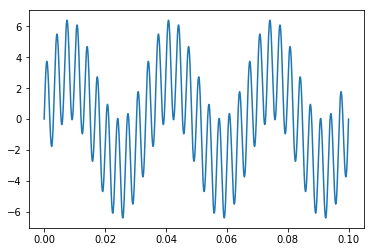

In [107]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
def sine_generator(timesteps, sinefreq):
    nsamples = len(timesteps)
    w = 2. * np.pi * sinefreq
    y_sine = np.sin(w * timesteps)*3.22
    result = pd.DataFrame({ 
        'data' : y_sine} ,index=timesteps)
    return result

def butter_highpass(cutoff, log_rate, order=5):
    nyq = 0.5 * log_rate
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, log_rate, order=5):
    b, a = butter_highpass(cutoff, log_rate, order=order)
    y = signal.filtfilt(b, a, data)
    return y


timesteps = np.linspace(0, 0.1, num = 20000)
log_rate = 200000 # samples per second
sine_fq = 300

sine_5Hz = sine_generator(timesteps,sine_fq)
sine_fq = 30 #Hz
sine_1Hz = sine_generator(timesteps,sine_fq)
sine = sine_5Hz + sine_1Hz
plt.plot(sine)

In [130]:
sine = sine_5Hz + sine_1Hz
sig1_amp = np.round(np.mod(timesteps, 0.01), decimals = 1)


sig = (np.mod(timesteps, 0.01) > 0.005*3/2)*np.sin(2* np.pi * (timesteps* 300)) #+ 0.2*np.random.randn(len(times))
sig[abs(sig)>0.9] = 2*np.sin(2* np.pi * (timesteps[abs(sig)>0.9]* 300))

sig = sig + ~(np.mod(timesteps, 0.01) > 0.005)*np.sin(2* np.pi * timesteps* 1000)* 0.1 + np.sin(2* np.pi * (timesteps* 10))
sine['data'] = data
#sine['data'] = sig

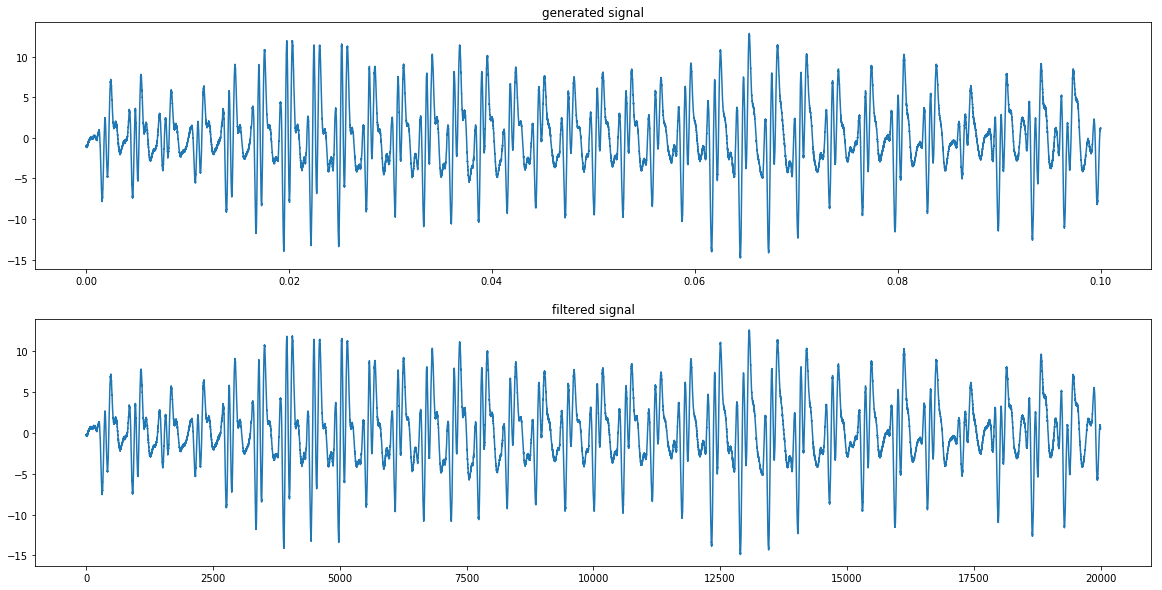

In [143]:
filtered_sine = butter_highpass_filter(sine.data, 200, log_rate)

plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(sine)
plt.title('generated signal')
plt.subplot(212)
plt.plot(range(len(filtered_sine)),filtered_sine)
plt.title('filtered signal')
plt.show()

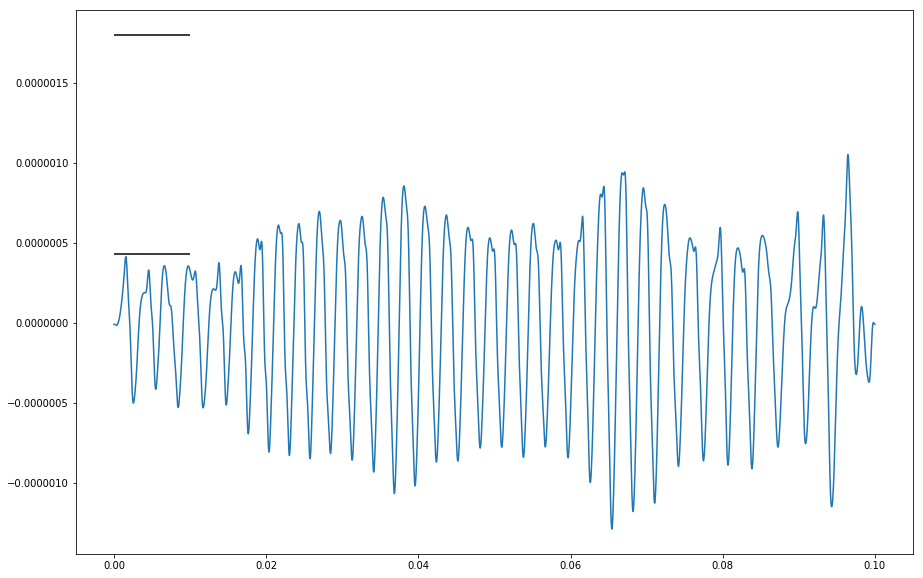

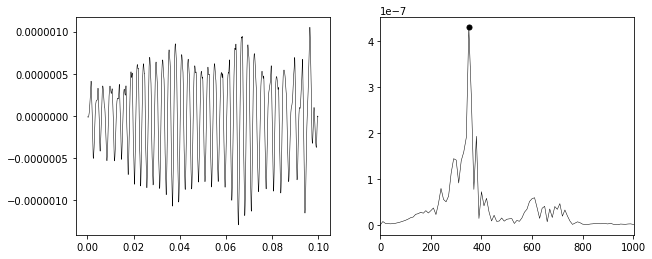

[  4.30702398e-07]


In [146]:
vel = np.cumsum(filtered_sine)/log_rate

pos = np.cumsum(vel - np.mean(vel)) / log_rate

aa = fft_()
aa.fit(timesteps, pos-np.mean(pos))
plt.figure(figsize = [15,10])
plt.plot(timesteps, pos - np.mean(pos))
plt.hlines(xmin = 0, xmax = 0.01, y = [aa.max_amp, 1.8e-06])
aa.plot_fft()
print(aa.max_amp)

In [132]:
fft = fft_()

In [133]:
fft.fit(timesteps, filtered_sine)

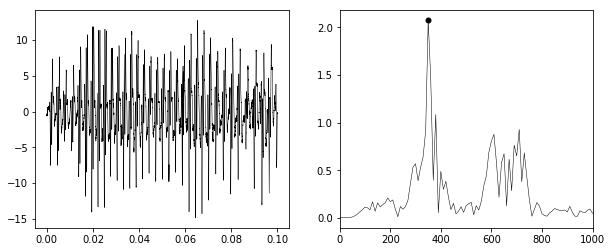

In [134]:
fft.plot_fft()

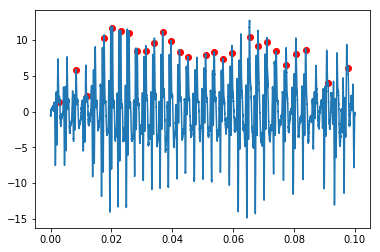

In [135]:
peakind = signal.find_peaks_cwt(filtered_sine, widths = np.arange(200, 400))
plt.plot(timesteps,filtered_sine)
plt.scatter(timesteps[peakind], np.array(filtered_sine)[peakind], c= 'red')

In [136]:
 np.array(sine.data)[peakind]

array([  1.28017354,   5.84289436,   2.07785202,  10.43752215,
        11.80952902,  11.29901484,  10.94803634,   8.42737251,
         8.3316511 ,   9.60793659,  11.36282911,  10.11845078,
         8.39546538,   7.53397267,   7.91685832,   8.3316511 ,
         7.34252984,   8.17211542,  10.53324356,   9.28886522,
         9.76747227,   8.49118679,   6.51294426,   8.04448687,
         8.90597957,   3.35413757,   4.59851598])

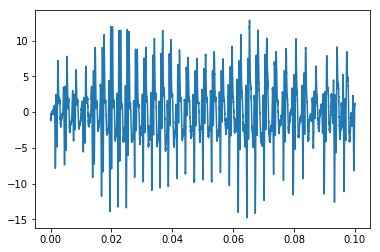

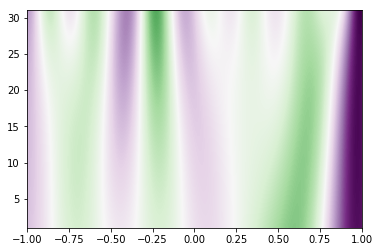

In [142]:
from scipy import signal
t = timesteps 
t= np.linspace(-1, 1, 200, endpoint=False)
sig  = sine.data
# filtered_sine 
#sig = np.cos(2 * np.pi * 7 * t) + signal.gausspulse(t - 0.4, fc=2)
widths = np.arange(1000, 2000)
cwtmatr = signal.cwt(sig, signal.ricker, widths)
plt.plot(sig)
plt.show()

plt.imshow(cwtmatr, extent=[-1, 1, 1, 31], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.show()

In [ ]:
# analytical calculate position amplitude
2.0 / (np.pi * 2 * 100)**2

In [ ]:
plt.plot(fft.frq,abs(fft.Y))
print(fft.amp_pos)
plt.xlim(0, 1000)

In [ ]:
vel = np.cumsum(signal)/log_rate

pos = np.cumsum(vel - np.mean(vel)) / log_rate

aa = fft_()
aa.fit(times, pos-np.mean(pos))
plt.figure(figsize = [15,10])
plt.plot(times, pos - np.mean(pos))
plt.hlines(xmin = 0, xmax = 0.01, y = [aa.max_amp, 1.8e-06])
aa.plot_fft()
print(aa.max_amp)

In [ ]:
v2 = np.diff(pos) *log_rate
a2 = np.diff(v2-np.mean(v2)) * log_rate
plt.figure(figsize = [15,10])

plt.plot(pos-np.mean(pos))
plt.show()

plt.plot(v2-np.mean(v2))
plt.show()
plt.plot(a2)
plt.show()


In [ ]:
import pdvega  # import adds vgplot attribute to pandas



In [ ]:
sig1 = np.sin(2* np.pi * times* 350)


signal = 5*np.sin(2* np.pi * times* 352)
signal[abs(sig1) < 0.99] =  sig1

#signal[signal < 0] =  signal[signal < 0]*5
signal = signal + np.random.randn(len(times))*0.4

signal.vgplot.line()

In [ ]:
#ii +=1
ar = accRecs[ii]
tmpdf1 = readMyFile(os.path.join(fold, ar))

signal = (tmpdf1.iloc[:,1] - np.mean(tmpdf1.iloc[:,1]))*1000 / 10.17
times = tmpdf1.iloc[:,0]
mxs = pd.Series(abs(signal)).rolling(int(tmpdf1.shape[0]/28), center = True, min_periods = 1).max().tolist()
print(int(tmpdf1.shape[0]/28))
plt.plot(abs(signal))
plt.plot(mxs)

plt.show()
plt.plot(signal)
plt.show()
plt.plot(signal[0:5000])



signal[0:5000].vgplot.line()



In [ ]:
fft = fft_()
fft.fit(times, signal-np.mean(signal))
fft.plot_fft()

In [ ]:
sig1 = np.sin(2* np.pi * times* 50)


signal = 5.44 * np.sin(2* np.pi * times* 200) + 4 * np.sin(2* np.pi * times* 400)
plt.plot(signal)

fft = fft_()
fft.fit(times, signal)
fft.plot_fft()

In [ ]:
len(times)

In [ ]:
print(bigDF.shape)
bigDF.head()

In [ ]:
print(hl.shape)
hl.datetime = [ff.strip() for ff in hl.datetime]
hl.head()

In [ ]:
# merge bigDF and hl

totalDF = pd.merge(bigDF, hl, left_on = ["fname_short", "freq"], right_on=["datetime", "freq"], how = "inner")
totalDF.shape

In [ ]:
totalDF.head()

In [ ]:
# change column names
totalDF2 =totalDF.rename(columns = {'amp_acc':'MinMax_amp_acc_m/s/s', 
                                    'amp': 'MinMax_amp_Volts', 
                                   'acc_amplitude_fft': 'acc_amplitude_fft_m/s/s', 
                                    'pos_amplitude_fft': 'pos_amplitude_fft_m'
                                   })
totalDF2.drop(["frq", "TT", "AA", "BB", "dd", "fname_short", "MaxMinAmp"], axis = 1, inplace = True)
totalDF2.head()


In [ ]:
plt.scatter(x = totalDF2['acc_amplitude_fft_m/s/s'], y = totalDF2['pos_amplitude_fft_m']*10**7, s= 1)

In [ ]:
# write to file
totalDF2.to_csv("/Users/cswitzer/Dropbox/SonicationBehavior/SonBehData/02_1_HeavyLight_cleaned_posAdded.csv", index = False)

In [ ]:
plt.scatter(x = totalDF2.MinMax_amp_Volts, y = totalDF2['acc_amplitude_fft_m/s/s'], s = 1)

In [ ]:
ar = accRecs[2]
stt = time.time()
dta = readMyFile(os.path.join(fold, ar))


#fft practice

#xx = np.linspace(0, 0.1, num = 1000)
#act = 2.09906008*np.sin(350*2*np.pi*xx) 
xx = dta.iloc[:,0 ]
act = dta.iloc[:,1]*1000 / 10.17

#plt.plot(xx, act)

log_rate = len(xx)*(1/(np.max(xx)))

n =len(act) # length of the signal
k = np.arange(n, step = 1)
T = n/log_rate
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range


# fft computing and normalization (note that *2 is so that it is scaled properly)
Y = np.fft.fft(act)/n *2 
Y = Y[range(int(n/2))]

# calculate top frequency
ind = np.argpartition(abs(Y), -4)[-4:]
# Find highest point on the spectrum
peakFrq = frq[ind[::-1]]
pwr = (abs(Y)[ind[::-1]])
domPK = [x for (y,x) in sorted(zip(pwr,peakFrq), reverse = True)][0]

beeFrqPwr = pwr[peakFrq == domPK]

plt.figure(figsize=(10,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[2,2]) 

#create subplot 1
ax1 = plt.subplot(gs[0])

ax1.plot(xx,act,color = 'black', linewidth=0.5 )

ax2 = plt.subplot(gs[1])
ax2.plot(frq,abs(Y), color = "black", linewidth=0.5)
ax2.plot(domPK, beeFrqPwr,'o', color = 'black', markersize = 5)

ax2.set_xlim(-0, 1003)
print(beeFrqPwr)

print(time.time() - stt)

In [ ]:
# processing -- find signal envelope

from scipy.signal import hilbert
duration = 0.1
fs = log_rate/2
samples = int(fs*duration)
t = np.arange(samples) / fs

signal = act
#signal *= (1.0 + 0.5 * np.sin(2.0*np.pi*3.0*t) )

analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
#instantaneous_frequency = (np.diff(instantaneous_phase) /
#                           (2.0*np.pi) * fs)


fig = plt.figure()
ax0 = fig.add_subplot(211)
ax0.plot(t, signal, label='signal')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()


In [ ]:
recDir = os.listdir("/Users/cswitzer/Dropbox/SonicationBehavior/SonBehData/SonicationBehavior_HeavyLight/Bee31_19Oct2016_Hive3_W_S/2016_10_19__11_23_02")
recDir = [ii for ii in recDir if not ii.startswith(".")]

print(len(recDir))
dct = "/Users/cswitzer/Dropbox/SonicationBehavior/SonBehData/SonicationBehavior_HeavyLight/Bee31_19Oct2016_Hive3_W_S/2016_10_19__11_23_02"
f = recDir[0]

# load in all data
def readCenter(f):
    tmp = np.transpose(pd.read_csv(os.path.join(dct, f), sep = " ", header = None))
    tmp.iloc[:,1] = tmp.iloc[:,1] - np.mean(tmp.iloc[:,1])
    tmp["name"] = f
    print(f)
    return(tmp)

df = pd.concat( [readCenter(f) for f in recDir] )
#np.transpose(pd.read_csv(os.path.join(dct, f), sep = " ", header = None))
#combined_csv = 

df.head()

In [ ]:
direct = "/Users/cswitzer/Dropbox/SonicationBehavior/SonBehData/SonicationBehavior_HeavyLight/Bee2_27Sept_Hive4_S_W/2016_09_27__11_54_44"

recDir = os.listdir(direct)
recDir = [ii for ii in recDir if not ii.startswith(".")]

print(len(recDir))
dct = direct
f = recDir[0]

# load in all data
def readCenter(f):
    tmp = np.transpose(pd.read_csv(os.path.join(dct, f), sep = " ", header = None))
    tmp.iloc[:,1] = tmp.iloc[:,1] - np.mean(tmp.iloc[:,1])
    tmp["name"] = f
    print(f)
    return(tmp)

df = pd.concat( [readCenter(f) for f in recDir] )
#np.transpose(pd.read_csv(os.path.join(dct, f), sep = " ", header = None))
#combined_csv = 

df.head()

In [ ]:
# calculate running mean and look at histogram
d2 = df

signal = np.array(d2.iloc[:,1]*1000 / 10.17) # convert from V to m/s/s
act = signal
times = d2.iloc[:,0]
xx = times


f, ax1 = plt.subplots()
f.set_figwidth(15)
ax1.plot( abs(signal),color = 'black', linewidth=0.5 )
#ax1.scatter(xs[peakind], data[peakind])
mxs = pd.Series(abs(signal)).rolling(int(d2.shape[0]/28/124), center = True, min_periods = 1).max().tolist()
print(int(d2.shape[0]/28))
ax1.plot(mxs)
plt.show()

plt.hist(np.array(mxs)[~np.isnan(np.array(mxs))], bins = 50)
plt.vlines(ymin = 0, ymax = 175000, x = 5)
plt.show()

In [ ]:
plt.plot(mxs[0:20000])

In [ ]:
dct = direct
recDir = os.listdir(direct)
recDir = [ii for ii in recDir if not ii.startswith(".")]
fle = os.path.join(dct, recDir[ff])
ff+=1

d2 = np.transpose(pd.read_csv(fle, sep = " ", header = None))

signal = d2.iloc[:,1]*1000 / 10.17 # convert from V to m/s/s
act = signal-np.mean(signal)
times = d2.iloc[:,0]
xx = times

log_rate = 200000.0

n =len(act) # length of the signal
k = np.arange(n, step = 1)
T = n/log_rate
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range

Y = np.fft.fft(act)/n # fft computing and normalization
Y = Y[range(int(n/2))]*2

# calculate top frequency
ind = np.argpartition(abs(Y), -4)[-4:]
# Find highest point on the spectrum
peakFrq = frq[ind[::-1]]
pwr = (abs(Y)[ind[::-1]])
domPK = [x for (y,x) in sorted(zip(pwr,peakFrq), reverse = True)][0]

beeFrqPwr = pwr[peakFrq == domPK]

plt.figure(figsize=(10,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[2,2]) 

# create subplot 1
ax1 = plt.subplot(gs[0])

ax1.plot(xx,act,color = 'black', linewidth=0.5 )

ax2 = plt.subplot(gs[1])
ax2.plot(frq,abs(Y), color = "black", linewidth=0.5)
ax2.plot(domPK, beeFrqPwr,'o', color = 'black', markersize = 5)

ax2.set_xlim(-3, 1003)
print(beeFrqPwr)


#plt.plot(d2.iloc[:,0], d2.iloc[:,1])
plt.show()


f, ax1 = plt.subplots()
f.set_figwidth(15)
ax1.plot(times, abs(signal),color = 'black', linewidth=0.5 )
#ax1.scatter(xs[peakind], data[peakind])
mxs = pd.Series(abs(signal)).rolling(int(d2.shape[0]/28), center = True, min_periods = 1).max().tolist()
print(int(d2.shape[0]/28))
ax1.plot(times, mxs)

from statsmodels.nonparametric.smoothers_lowess import lowess


ssmp = np.array((np.linspace(0, len(mxs), num = 100) - 1).astype(int))
smth = lowess(endog = np.array(mxs)[ssmp], exog = np.array(times)[ssmp], frac = 0.06)
ax1.plot(times[ssmp], smth[:,1])
plt.show()
plt.hist(np.array(mxs)[~np.isnan(np.array(mxs))])
plt.show()


#________________________
# calculate fft for subset of data

df3 = d2.iloc[np.array(mxs) > 1.5, :].reset_index(drop=True)
signal = df3.iloc[:,1]*1000 / 10.17
act = signal-np.mean(signal)
times = df3.iloc[:,0]
xx = times

log_rate = 200000.0

n =len(act) # length of the signal
k = np.arange(n, step = 1)
T = n/log_rate
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range

Y = np.fft.fft(act)/n # fft computing and normalization
Y = Y[range(int(n/2))]*2

# calculate top frequency
ind = np.argpartition(abs(Y), -4)[-4:]
# Find highest point on the spectrum
peakFrq = frq[ind[::-1]]
pwr = (abs(Y)[ind[::-1]])
domPK = [x for (y,x) in sorted(zip(pwr,peakFrq), reverse = True)][0]

beeFrqPwr = pwr[peakFrq == domPK]

plt.figure(figsize=(10,4))
gs = gridspec.GridSpec(1, 2, width_ratios=[2,2]) 

# create subplot 1
ax1 = plt.subplot(gs[0])

ax1.plot(xx,act,color = 'black', linewidth=0.5 )

ax2 = plt.subplot(gs[1])
ax2.plot(frq,abs(Y), color = "black", linewidth=0.5)
ax2.plot(domPK, beeFrqPwr,'o', color = 'black', markersize = 5)

ax2.set_xlim(-3, 1003)
print(beeFrqPwr)


#plt.plot(d2.iloc[:,0], d2.iloc[:,1])
plt.show()


f, ax1 = plt.subplots()
f.set_figwidth(15)
ax1.plot(abs(signal),color = 'black', linewidth=0.5 )
#ax1.scatter(xs[peakind], data[peakind])
mxs = pd.Series(abs(signal)).rolling(int(d2.shape[0]/28), center = True).max().tolist()
print(int(d2.shape[0]/28))
ax1.plot(np.array(mxs))

In [ ]:
plt.plot(smth[:,1])

In [ ]:
# print system info
import IPython
print(IPython.sys_info())

In [ ]:
# convert to html, so ppl don't have to run python to see code
!jupyter nbconvert --to html 008_ExampleFigureSpectrum